# TASK 7

### Импорт данных

In [35]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import time

In [36]:
start_day = '2021-01-01'
assetList = ['CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX']

In [37]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()
    returns = yf.Ticker(company)
    data = returns.history(period="1y",start=start_day)
    df.index = data.index
    df[company] = data.Close
    return df

In [38]:
print(get_One_Asset('CTXS', start_day))

Got error from yahoo api for ticker CTXS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- CTXS: No timezone found, symbol may be delisted
Empty DataFrame
Columns: [CTXS]
Index: []


Данные по акциям компании CTXS Citrix Systems Information Technology не загружаются, поэтому ее из списка я убрал

In [39]:
assetList.remove('CTXS')

In [40]:
assets = []
for company in assetList:
    assets.append(get_One_Asset(company, start_day))
data = pd.concat(assets, axis=1)
data

,CRM,CSCO,CSX,CTAS,CTLT,CTSH,CTVA,CVS,CVX
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,220.309998,41.104111,28.544308,336.145721,103.730003,76.892998,37.432178,66.294914,77.011703
2021-01-05 00:00:00-05:00,221.520004,41.122814,29.027668,341.320984,104.830002,77.115677,37.890934,66.740112,79.093605
2021-01-06 00:00:00-05:00,216.149994,41.515537,29.799751,343.375397,106.239998,77.599754,40.087086,68.729233,81.639153
2021-01-07 00:00:00-05:00,217.979996,42.039154,30.503706,347.357117,108.570000,78.374329,40.799618,70.083755,82.020966
2021-01-08 00:00:00-05:00,222.039993,42.132660,31.090878,342.553619,112.489998,79.342491,42.214909,70.907814,82.802818
...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,191.490005,51.330002,29.990000,450.010010,67.260002,61.110001,60.290001,76.040001,168.289993
2023-04-11 00:00:00-04:00,188.889999,50.619999,30.309999,450.260010,65.440002,61.689999,60.930000,76.290001,169.220001
2023-04-12 00:00:00-04:00,190.320007,50.110001,30.160000,453.940002,64.250000,60.279999,61.790001,74.919998,169.820007


Пронормируем данные

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
rates = pd.DataFrame(StandardScaler().fit_transform(data), index=data.index, columns=data.columns)
rates

,CRM,CSCO,CSX,CTAS,CTLT,CTSH,CTVA,CVS,CVX
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,0.297144,-1.589784,-1.388590,-1.501387,0.190097,0.595393,-1.772554,-1.976441,-1.654442
2021-01-05 00:00:00-05:00,0.324424,-1.585901,-1.182738,-1.367651,0.232763,0.619971,-1.716441,-1.935937,-1.590925
2021-01-06 00:00:00-05:00,0.203354,-1.504371,-0.853926,-1.314562,0.287452,0.673401,-1.447815,-1.754968,-1.513262
2021-01-07 00:00:00-05:00,0.244613,-1.395666,-0.554129,-1.211669,0.377825,0.758894,-1.360661,-1.631734,-1.501613
2021-01-08 00:00:00-05:00,0.336148,-1.376254,-0.304066,-1.335798,0.529868,0.865754,-1.187548,-1.556762,-1.477759
...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,-0.352620,0.533139,-0.772904,1.441033,-1.224452,-1.146649,1.023333,-1.089839,1.130406
2023-04-11 00:00:00-04:00,-0.411239,0.385741,-0.636624,1.447494,-1.295044,-1.082632,1.101615,-1.067094,1.158780
2023-04-12 00:00:00-04:00,-0.378999,0.279863,-0.700505,1.542590,-1.341200,-1.238260,1.206807,-1.191736,1.177086


Проведем анализ метода главных компонент нормированных цен

In [43]:
from sklearn.decomposition import PCA
from sklearn import linear_model

pca = PCA(svd_solver='full')
pca.fit(rates)
print('Explained variance by factors:\n', pca.explained_variance_.round(1))

Explained variance by factors:
 [4.8 2.5 0.8 0.4 0.2 0.2 0.1 0.1 0. ]


In [44]:
pca_factors = pd.DataFrame(pca.transform(rates),
                           columns=['pca.f{}'.format(i+1)
                                    for i in range(pca.n_components_)],
                           index=rates.index)
pca_factors.head()


,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,-1.929248,3.369301,-0.464375,-0.401763,-0.283251,0.020955,1.146621,-0.277502,0.224648
2021-01-05 00:00:00-05:00,-1.913347,3.155055,-0.443183,-0.371150,-0.397027,-0.083693,1.136664,-0.295112,0.245186
2021-01-06 00:00:00-05:00,-1.788688,2.772003,-0.583918,-0.400957,-0.479585,-0.213673,0.986188,-0.343083,0.113240
2021-01-07 00:00:00-05:00,-1.862439,2.422243,-0.609077,-0.383454,-0.552207,-0.325940,0.932829,-0.362204,0.062466
2021-01-08 00:00:00-05:00,-1.981714,2.219252,-0.788470,-0.375403,-0.690082,-0.412972,0.773655,-0.265814,-0.029724


Построить график важности каждой главной компоненты

Text(0.5, 1.0, 'Важность главных компонент')

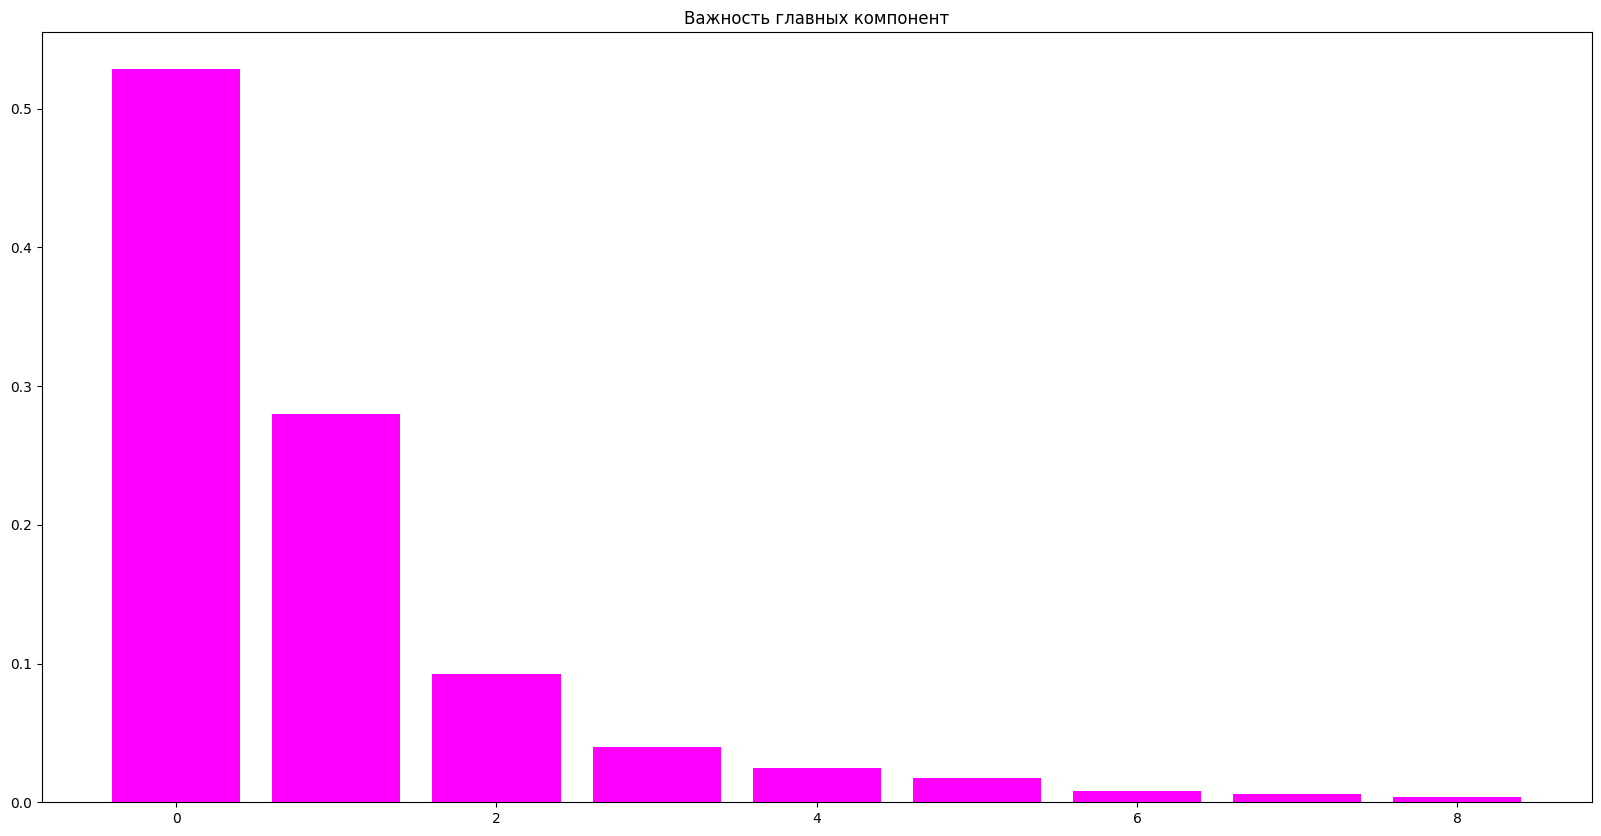

In [45]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(pca.components_.shape[0]), pca.explained_variance_ratio_, color='magenta')
plt.title("Важность главных компонент")

<AxesSubplot:xlabel='Date'>

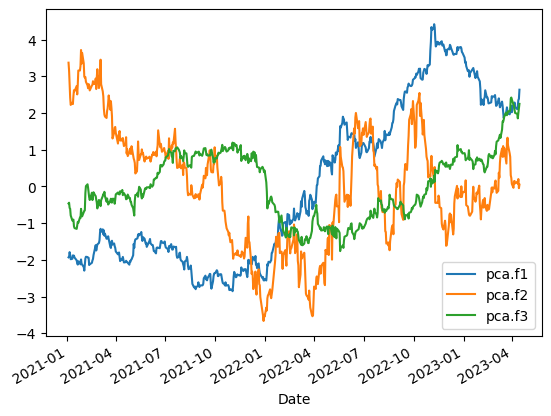

In [46]:
pca_factors[['pca.f1', 'pca.f2','pca.f3']].plot()

Получим три факторные нагрузки (shift,twist,butterfly) с помощью линейной регрессионной модели

In [47]:
regr = linear_model.LinearRegression()

rf1 = regr.fit(rates, pca_factors['pca.f1'])
reg_l1 = pd.DataFrame({'reg.l1': rf1.coef_})

rf2 = regr.fit(rates, pca_factors['pca.f2'])
reg_l2 = pd.DataFrame({'reg.l2': rf2.coef_})

rf3 = regr.fit(rates, pca_factors['pca.f3'])
reg_l3 = pd.DataFrame({'reg.l3': rf3.coef_})

loadings_by_regression = reg_l1.join([reg_l2, reg_l3])
print('Loadings by regression: \n', loadings_by_regression)

Loadings by regression: 
      reg.l1    reg.l2    reg.l3
0 -0.421341 -0.071451  0.304936
1 -0.250115 -0.428025  0.401093
2 -0.179403 -0.534805 -0.098272
3  0.248521 -0.378923  0.574782
4 -0.409669 -0.019267 -0.169461
5 -0.331708 -0.290958 -0.443573
6  0.428422 -0.153834 -0.076060
7  0.180532 -0.473534 -0.405420
8  0.414692 -0.221727 -0.102380


Построим автоэнкодер с 3 нейронами на внутренним слое и с выходом в 9 нейронов (размерность входа тоже 9)

In [48]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [49]:
encoding_dim = 3
# encode:
input_layer = Input(shape=(rates.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(rates.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')  

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 9)]               0         
                                                                 
 encoder (Functional)        (None, 3)                 27        
                                                                 
 decoder (Functional)        (None, 9)                 27        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [50]:
encoding_dim = 3
# encode:
input_layer = Input(shape=(rates.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(rates.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')  

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 9)]               0         
                                                                 
 encoder (Functional)        (None, 3)                 27        
                                                                 
 decoder (Functional)        (None, 9)                 27        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [51]:
autoencoder.fit(rates, rates,
                verbose=0,
                epochs=6000,
                batch_size=rates.shape[0])

In [52]:
encoded_rates = pd.DataFrame(encoder.predict(rates), index=rates.index, columns=['ae.f1', 'ae.f2','ae.f3'])
print(encoded_rates.head())

18/18 [==============================] - 0s 997us/step
                              ae.f1     ae.f2     ae.f3
Date                                                   
2021-01-04 00:00:00-05:00 -3.548754 -0.567913  2.922964
2021-01-05 00:00:00-05:00 -3.393555 -0.616597  2.702645
2021-01-06 00:00:00-05:00 -3.194782 -0.516002  2.326442
2021-01-07 00:00:00-05:00 -3.040455 -0.646625  1.926993
2021-01-08 00:00:00-05:00 -3.111696 -0.694671  1.649526


Построим коды 3 факторов до вращения

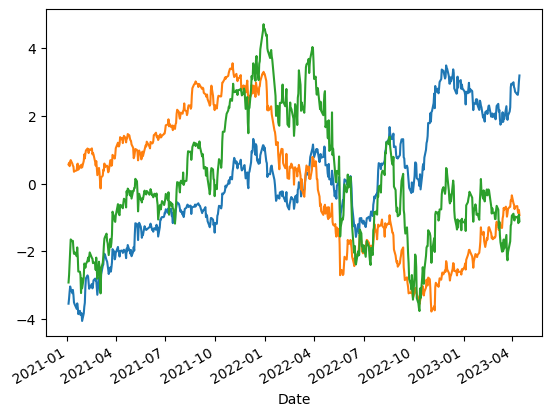

In [53]:
encoded_f1_plot = encoded_rates['ae.f1']
encoded_f2_plot = -encoded_rates['ae.f2']
encoded_f3_plot = -encoded_rates['ae.f3']
encoded_f1_plot.plot()
encoded_f2_plot.plot()
encoded_f3_plot.plot()
plt.show()

In [54]:
rfa1 = regr.fit(rates, encoded_rates['ae.f1'])
rega_l1 = pd.DataFrame({'rega.l1': rfa1.coef_})

rfa2 = regr.fit(rates, encoded_rates['ae.f2'])
rega_l2 = pd.DataFrame({'rega.l2': rfa2.coef_})

rfa3 = regr.fit(rates, encoded_rates['ae.f3'])
rega_l3 = pd.DataFrame({'rega.l3': rfa3.coef_})

ae_loadings_by_regression = rega_l1.join([rega_l2,rega_l3])
print('Autoencoder loadings by regression: \n',ae_loadings_by_regression)

Autoencoder loadings by regression: 
     rega.l1   rega.l2   rega.l3
0  0.074016 -0.583108 -0.230558
1  0.447328 -0.556347 -0.512626
2  0.159186 -0.223005 -0.640811
3  0.779867 -0.200700 -0.249975
4 -0.350176 -0.247654 -0.162684
5 -0.382592 -0.079984 -0.443254
6  0.297247  0.368180 -0.036268
7  0.078459  0.279042 -0.480979
8  0.296988  0.357388 -0.115627


Проверим коррелируемость данных

In [55]:
pd.concat([pca_factors, encoded_rates], axis=1).corr().round(2)

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9,ae.f1,ae.f2,ae.f3
pca.f1,1.00,0.00,0.00,-0.0,0.0,0.0,-0.00,0.00,-0.0,0.71,0.94,0.40
pca.f2,0.00,1.00,0.00,-0.0,-0.0,0.0,0.00,0.00,-0.0,-0.57,0.19,0.91
pca.f3,0.00,0.00,1.00,0.0,0.0,0.0,0.00,-0.00,0.0,0.42,-0.27,0.04
pca.f4,-0.00,-0.00,0.00,1.0,-0.0,0.0,0.00,0.00,0.0,-0.00,0.00,0.00
pca.f5,0.00,-0.00,0.00,-0.0,1.0,0.0,-0.00,-0.00,0.0,0.00,-0.00,-0.00
pca.f6,0.00,0.00,0.00,0.0,0.0,1.0,0.00,-0.00,0.0,-0.00,0.00,0.00
pca.f7,-0.00,0.00,0.00,0.0,-0.0,0.0,1.00,0.00,0.0,-0.01,0.00,0.00
pca.f8,0.00,0.00,-0.00,0.0,-0.0,-0.0,0.00,1.00,-0.0,0.01,-0.00,-0.01
pca.f9,-0.00,-0.00,0.00,0.0,0.0,0.0,0.00,-0.00,1.0,-0.00,0.00,-0.00
ae.f1,0.71,-0.57,0.42,-0.0,0.0,-0.0,-0.01,0.01,-0.0,1.00,0.45,-0.21


Факторы от автоэнкодера дейстивтельно коррелируемы. Повернем их, чтобы от этого избавиться

In [56]:
encoded_rates.cov()

,ae.f1,ae.f2,ae.f3
ae.f1,2.916267,1.536167,-0.675321
ae.f2,1.536167,3.951857,1.991656
ae.f3,-0.675321,1.991656,3.417847


In [57]:
eg_vect_factors = np.linalg.eig(encoded_rates.cov())[1]
eg_vect_factors = pd.DataFrame(eg_vect_factors)
eg_vect_factors 

,0,1,2
0,0.567637,-0.774701,0.278617
1,-0.599482,-0.156987,0.784842
2,0.564278,0.612531,0.553531


In [69]:
rotated_factors = pd.DataFrame(np.dot(encoded_rates, eg_vect_factors), \
                              columns=['rot.f1','rot.f2','rot.f3'])
rotated_factors.head()

,rot.f1,rot.f2,rot.f3
0,-0.024587,4.628783,0.183488
1,-0.031626,4.381241,0.066566
2,-0.191382,3.981022,-0.007341
3,-0.250876,3.637297,-0.287969
4,-0.419081,3.530073,-0.499114


In [59]:
rotated_factors.cov()

,rot.f1,rot.f2,rot.f3
rot.f1,6.225950e-01,-1.488048e-16,-1.289641e-15
rot.f2,-1.488048e-16,3.761514e+00,0.000000e+00
rot.f3,-1.289641e-15,0.000000e+00,5.901862e+00


Как мы видим, от коррелируемости мы действительно избавились

Проверим соответствие факторов

In [60]:
def defineOrder(pca_factors, rot_factors):
    pca_cols = pca_factors.columns
    rot_cols = rot_factors.columns
    ncol = len(pca_cols)
    mylist = []
    alllist = []
    i = 0

    for pca_col in pca_cols:
        pcaf = pca_factors[pca_col]
        j = 0
        for rot_col in rot_cols:
            rotf = rot_factors[rot_col]
            cor = np.corrcoef(pcaf, rotf)[0, 1]
            print(i, j, abs(cor))
            mylist = []
            mylist.append(i)
            mylist.append(j)
            mylist.append(abs(cor))
            mylist.append(np.sign(cor))
            alllist.append(mylist)
            j = j+1
        i = i + 1
    df = pd.DataFrame(alllist, columns=['col1', 'col2', 'value', 'sign'])
    df = df.sort_values(by=['value'], ascending=False)
    df = df[:ncol]
    df = df.sort_values(by='col1')
    return df


In [61]:
norm_factors = pd.DataFrame()

for i in range(3):
    rotated_factors['rot.f' + str(i + 1)] = rotated_factors['rot.f' + str(i + 1)] / rotated_factors['rot.f' + str(i + 1)].std()
    norm_factors['pca.f' + str(i + 1)] = pca_factors['pca.f' + str(i + 1)] / pca_factors['pca.f' + str(i + 1)].std()

In [62]:
orderdf= defineOrder(norm_factors, rotated_factors)
orderdf

0 0 0.01684280107085744
0 1 0.4022279180756439
0 2 0.9153825719952025
1 0 0.23042773743220313
1 1 0.8892798512437884
1 2 0.3950011664379959
2 0 0.9728915155599074
2 1 0.21749311107068428
2 2 0.07768172286591034


,col1,col2,value,sign
2,0,2,0.915383,1.0
4,1,1,0.889280,1.0
6,2,0,0.972892,1.0


Видим, что                  
1-му РСА фактору соответствует 3-й повернутый фактор от автоэнкодера с тем же знаком.                              
2-му РСА фактору соответствует 2-й повернутый фактор от автоэнкодера с тем же знаком.                           
3-му РСА фактору соответствует 1-й повернутый фактор от автоэнкодера с тем же знаком.

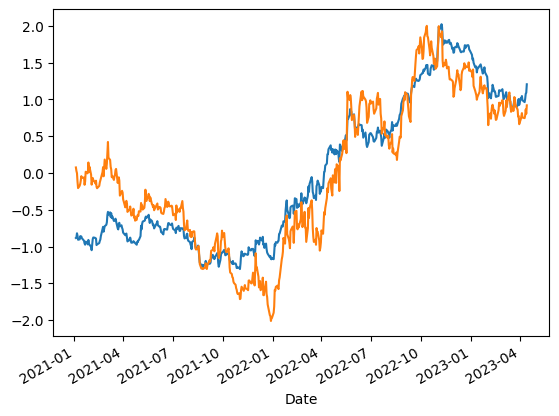

In [72]:
pca_f_plot = pca_factors['pca.f1']/pca_factors['pca.f1'].std()
rot_f_plot = rotated_factors['rot.f3']/rotated_factors['rot.f3'].std()
pca_f_plot.plot()
rot_f_plot.index = pca_f_plot.index
rot_f_plot.plot()
plt.show()


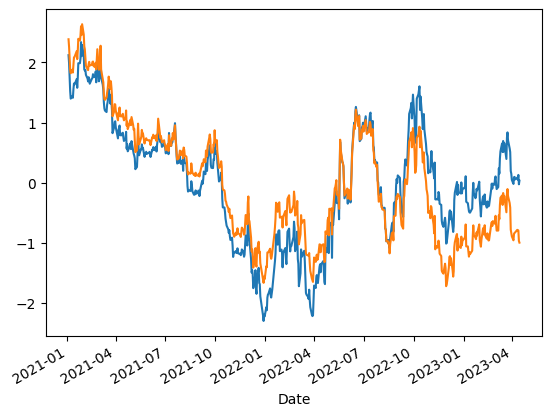

In [64]:
pca_f_plot = pca_factors['pca.f2']/pca_factors['pca.f2'].std()
rot_f_plot = rotated_factors['rot.f2']/rotated_factors['rot.f2'].std()
pca_f_plot.plot()
rot_f_plot.index = pca_f_plot.index
rot_f_plot.plot()
plt.show()

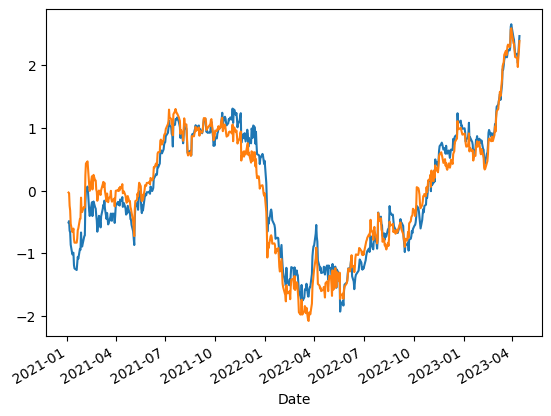

In [73]:
pca_f_plot = pca_factors['pca.f3']/pca_factors['pca.f3'].std()
rot_f_plot = rotated_factors['rot.f1']/rotated_factors['rot.f1'].std()
pca_f_plot.plot()
rot_f_plot.index = pca_f_plot.index
rot_f_plot.plot()
plt.show()

Как мы видим, факторы очень похожи

Повернем факторные нагрузки и сравните на графиках с нагрузками PCA

In [74]:
rotated_loadings = pd.DataFrame(np.dot(ae_loadings_by_regression[['rega.l1', 'rega.l2', 'rega.l3']],
                                       eg_vect_factors), columns=['rot.l1', 'rot.l2', 'rot.l3'])
print(rotated_loadings)

     rot.l1    rot.l2    rot.l3
0  0.261478 -0.107024 -0.564646
1  0.298176 -0.573205 -0.595766
2 -0.137548 -0.480829 -0.485380
3  0.421942 -0.725773 -0.078602
4 -0.142108  0.210511 -0.381985
5 -0.419343  0.037444 -0.414726
6 -0.072454 -0.310292  0.351705
7 -0.394150 -0.399203 -0.025373
8 -0.110912 -0.357008  0.299236


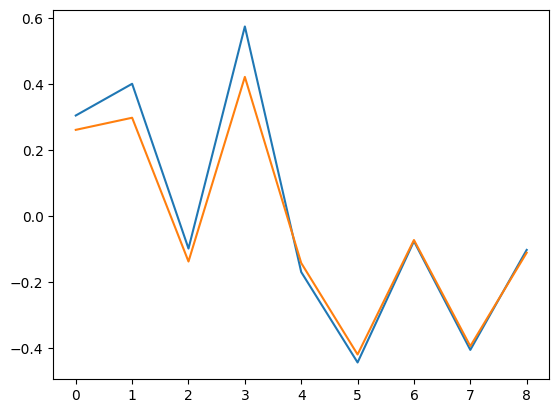

In [75]:
pca_l_plot = loadings_by_regression['reg.l3']
rot_l_plot = rotated_loadings['rot.l1']
pca_l_plot.plot()
rot_l_plot.plot()
plt.show()

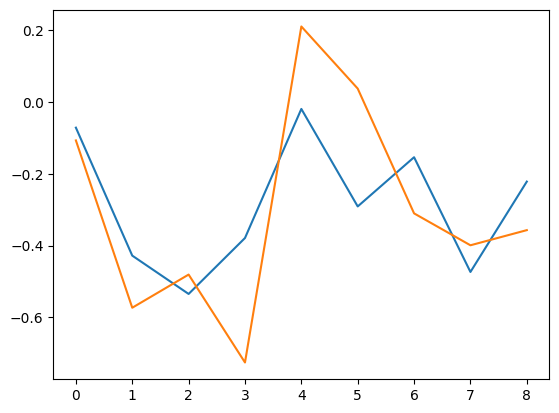

In [76]:
pca_l_plot = loadings_by_regression['reg.l2']
rot_l_plot = rotated_loadings['rot.l2']
pca_l_plot.plot()
rot_l_plot.plot()
plt.show()

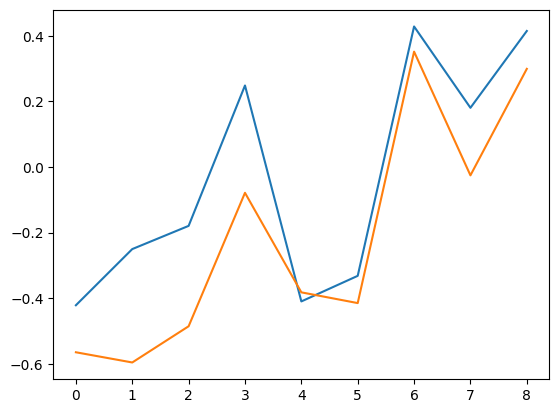

In [77]:
pca_l_plot = loadings_by_regression['reg.l1']
rot_l_plot = rotated_loadings['rot.l3']
pca_l_plot.plot()
rot_l_plot.plot()
plt.show()

Видим, что нагрузки стали тоже довольно таки похожими

#### Рачков Денис, 316